In [64]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline


In [65]:
df = pd.read_csv("AirPassengers.csv")

df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


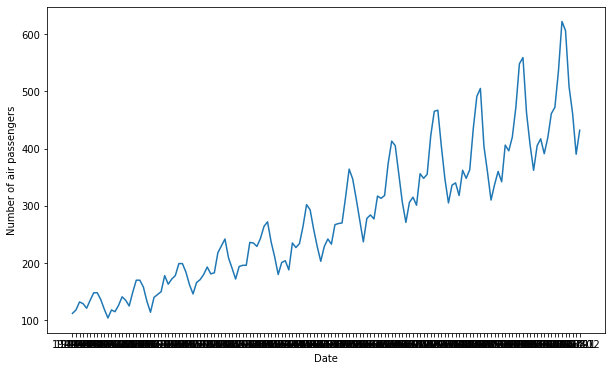

In [66]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# plotting forecast sales
plt.plot(df['Month'], df['#Passengers'])
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.show()

In [67]:
df.rename(columns={'Month':'ds','#Passengers':'y'},inplace=True)

In [68]:
train_data = df[:len(df)-12]
print(train_data)
test_data = df[len(df)-12:]
print(test_data.shape)
test_data

          ds    y
0    1949-01  112
1    1949-02  118
2    1949-03  132
3    1949-04  129
4    1949-05  121
..       ...  ...
127  1959-08  559
128  1959-09  463
129  1959-10  407
130  1959-11  362
131  1959-12  405

[132 rows x 2 columns]
(12, 2)


,ds,y
132,1960-01,417
133,1960-02,391
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461


In [69]:
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.95)

# train model
model.fit(train_data)

15:44:27 - cmdstanpy - INFO - Chain [1] start processing
15:44:27 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
future = model.make_future_dataframe(periods=12, freq='M')

In [71]:
future.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [72]:
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-07-31
140,1960-08-31
141,1960-09-30
142,1960-10-31


In [73]:
forecast = model.predict(future)

In [74]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
134,1960-02-29,452.736522,415.111340,492.420877,452.591957,452.876769,0.931364,0.931364,0.931364,0.931364,0.931364,0.931364,0.0,0.0,0.0,453.667885
135,1960-03-31,455.751939,406.005317,483.739506,455.529770,455.960443,-10.252458,-10.252458,-10.252458,-10.252458,-10.252458,-10.252458,0.0,0.0,0.0,445.499482
136,1960-04-30,458.670086,412.644865,495.181826,458.328944,458.971677,-5.632771,-5.632771,-5.632771,-5.632771,-5.632771,-5.632771,0.0,0.0,0.0,453.037315
137,1960-05-31,461.685504,448.026536,526.637944,461.260972,462.081784,27.375081,27.375081,27.375081,27.375081,27.375081,27.375081,0.0,0.0,0.0,489.060585
138,1960-06-30,464.603650,495.233589,570.159125,464.090283,465.076590,67.546752,67.546752,67.546752,67.546752,67.546752,67.546752,0.0,0.0,0.0,532.150402
139,1960-07-31,467.619068,492.600361,569.129358,467.007557,468.205703,63.485483,63.485483,63.485483,63.485483,63.485483,63.485483,0.0,0.0,0.0,531.104551
140,1960-08-31,470.634486,445.023951,522.168621,469.910826,471.325936,13.304797,13.304797,13.304797,13.304797,13.304797,13.304797,0.0,0.0,0.0,483.939282
141,1960-09-30,473.552632,410.707511,487.043949,472.738843,474.365613,-24.895320,-24.895320,-24.895320,-24.895320,-24.895320,-24.895320,0.0,0.0,0.0,448.657312
142,1960-10-31,476.568050,380.497349,458.313718,475.631639,477.516396,-57.895129,-57.895129,-57.895129,-57.895129,-57.895129,-57.895129,0.0,0.0,0.0,418.672921
143,1960-11-30,479.486196,410.925985,489.107079,478.433109,480.542931,-28.899622,-28.899622,-28.899622,-28.899622,-28.899622,-28.899622,0.0,0.0,0.0,450.586574


In [75]:
df_new = forecast[['ds', 'yhat']]

In [76]:
df_new

,ds,yhat
0,1949-01-01,85.599656
1,1949-02-01,79.316693
2,1949-03-01,116.850176
3,1949-04-01,109.548869
4,1949-05-01,112.513020
...,...,...
139,1960-07-31,531.104551
140,1960-08-31,483.939282
141,1960-09-30,448.657312
142,1960-10-31,418.672921


In [77]:
df_new = df_new[len(df_new)-12:]

In [78]:
df_new

,ds,yhat
132,1959-12-31,426.581303
133,1960-01-31,425.350429
134,1960-02-29,453.667885
135,1960-03-31,445.499482
136,1960-04-30,453.037315
137,1960-05-31,489.060585
138,1960-06-30,532.150402
139,1960-07-31,531.104551
140,1960-08-31,483.939282
141,1960-09-30,448.657312


In [79]:
#df_new = df_new.set_index(['ds'])

In [80]:
df_new

,ds,yhat
132,1959-12-31,426.581303
133,1960-01-31,425.350429
134,1960-02-29,453.667885
135,1960-03-31,445.499482
136,1960-04-30,453.037315
137,1960-05-31,489.060585
138,1960-06-30,532.150402
139,1960-07-31,531.104551
140,1960-08-31,483.939282
141,1960-09-30,448.657312


In [81]:
#test_data = test_data.set_index(['ds'])

In [82]:
test_data

,ds,y
132,1960-01,417
133,1960-02,391
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461


In [83]:
import numpy as np
Y = test_data['y']
Yhat = df_new['yhat']
y_true, Y_pred = np.array(Y), np.array(Yhat)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100
print(mape)

6.766339412134164


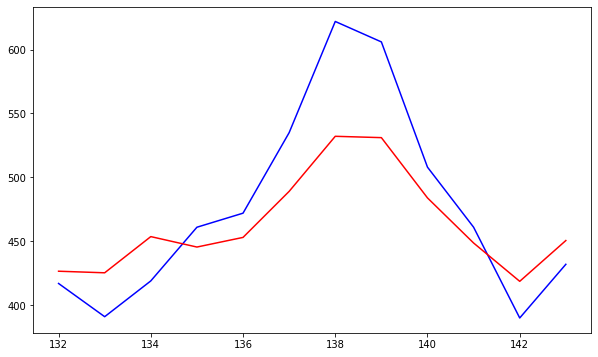

In [84]:
orig = plt.plot(test_data['y'], color='blue', label='Original')
predicted = plt.plot(df_new['yhat'], color='red', label='Predicted')
plt.show()